## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

#### Import necessary packages, setup dataframe

In [2]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder


%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

With the data loaded, we're able to perform EDA.
We're looking to answer our business questions, so first we'll cut out all fields that we don't need.
We'll also OneHotEncode categorical values so that we can perform regression on them.
Finally, we've also changed some columns to binary values to help us answer our business questions.
Our changes to the dataframe are as follows:

`id` - DEL

`date` - DEL

`price` - Sale price (prediction target)
Is normally distributed at lower prices, but has many outliers over 2.3mil.
Houses sold at outlier amounts are removed.

`bedrooms` - Number of bedrooms

`bathrooms` - Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom).
Change 0 bathroom to 1 bathroom. Round up other values.

`sqft_living` - Square footage of living space in the home

`sqft_lot` - DEL

`floors` - DEL

`waterfront` - ONEHOT

`greenbelt` - BINARY

`nuisance` - BINARY

`view` - ORDINAL

`condition` - ORDINAL

`grade` - DEL

`heat_source` - DEL

`sewer_system` - BINARY

`sqft_above` - DEL

`sqft_basement` - BINARY

`sqft_garage` - BINARY

`sqft_patio` - BINARY

`yr_built` - Year when house was built

`yr_renovated` - BINARY

`address` - GET ZIP, ONEHOT

`lat` - DEL

`long` - DEL

In [4]:
# Examine the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [5]:
df_original = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

## Clean the dataframe, perform encoding, create new columns where necessary

In [7]:
df_houses = df_original.copy()

In [8]:
# Drop unnecessary columns
df_houses = df_houses.drop(['id','heat_source','sqft_lot','sqft_patio','sqft_basement','sewer_system','floors'], axis=1)

# Create binary substitutes for columns
df_houses['garage_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]
df_houses['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in df['waterfront']]
df_houses['patio_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]

# Create zip from address
df_houses['zip'] = [x.split(',')[2][-5:] for x in df_houses['address']] 


# Using OneHotEncoder
view_cat = df[['view']]
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
encoder_view = OrdinalEncoder(categories=[view_categories])
encoder_view.fit(view_cat)
encoder_view.categories_[0]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
df_houses["view"] = view_encoded_train

In [9]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               30155 non-null  datetime64[ns]
 1   price              30155 non-null  float64       
 2   bedrooms           30155 non-null  int64         
 3   bathrooms          30155 non-null  float64       
 4   sqft_living        30155 non-null  int64         
 5   waterfront         30155 non-null  object        
 6   greenbelt          30155 non-null  object        
 7   nuisance           30155 non-null  object        
 8   view               30155 non-null  float64       
 9   condition          30155 non-null  object        
 10  grade              30155 non-null  object        
 11  sqft_above         30155 non-null  int64         
 12  sqft_garage        30155 non-null  int64         
 13  yr_built           30155 non-null  int64         
 14  yr_ren

In [29]:
df_houses2 = df_houses[(df_houses['sqft_living'] > 1400) & (df_houses['bedrooms'] > 2) & (df_houses['yr_built'] > 1999)]
df_houses2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 3 to 30153
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               6764 non-null   datetime64[ns]
 1   price              6764 non-null   float64       
 2   bedrooms           6764 non-null   int64         
 3   bathrooms          6764 non-null   float64       
 4   sqft_living        6764 non-null   int64         
 5   waterfront         6764 non-null   object        
 6   greenbelt          6764 non-null   object        
 7   nuisance           6764 non-null   object        
 8   view               6764 non-null   float64       
 9   condition          6764 non-null   object        
 10  grade              6764 non-null   object        
 11  sqft_above         6764 non-null   int64         
 12  sqft_garage        6764 non-null   int64         
 13  yr_built           6764 non-null   int64         
 14  yr_reno

<AxesSubplot:>

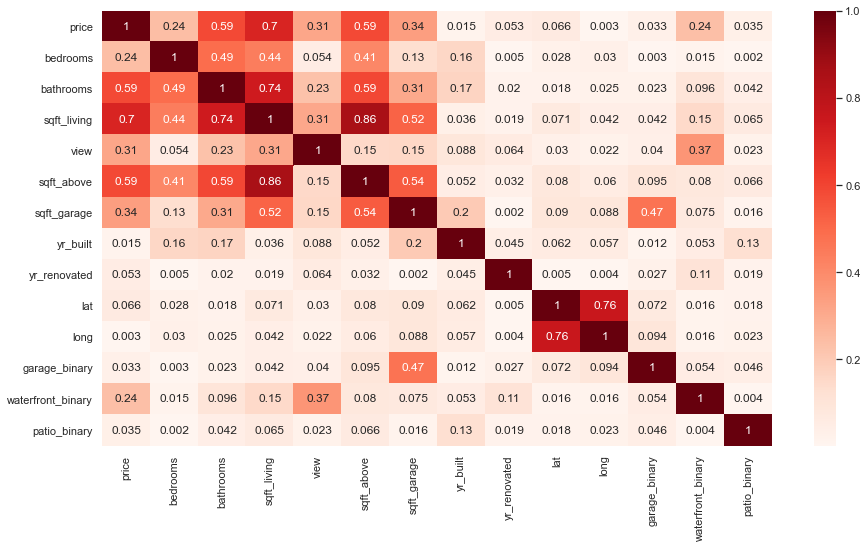

In [11]:
corr = round(abs(df_houses2.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

In [12]:
df_houses3 = df_houses2.drop(['sqft_garage','long','bedrooms','sqft_above','garage_binary','bathrooms','grade','waterfront','greenbelt','nuisance','address','patio_binary','waterfront_binary'], axis=1)


# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = df_houses3[['condition']]
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
encoder_condition = OrdinalEncoder(categories=[condition_categories])
encoder_condition.fit(condition_cat)
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
df_houses3["condition"] = condition_encoded_train


<AxesSubplot:>

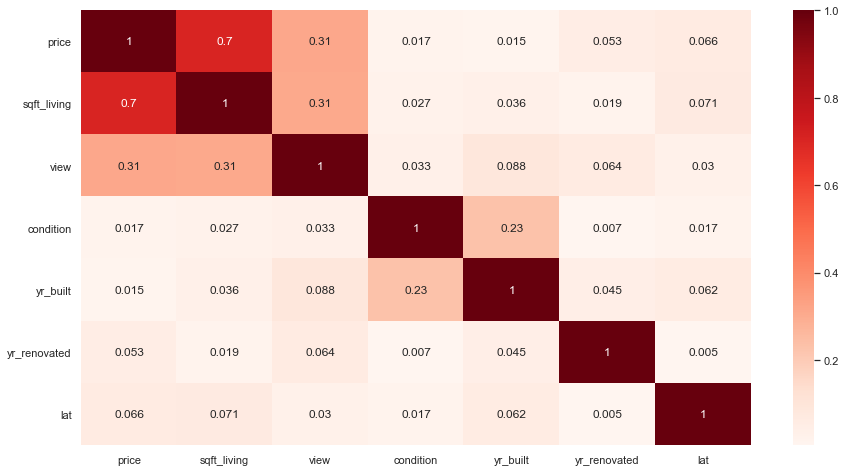

In [13]:
corr = round(abs(df_houses3.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

At this point we have cleaned data and are able to perform regression and analyze the data.

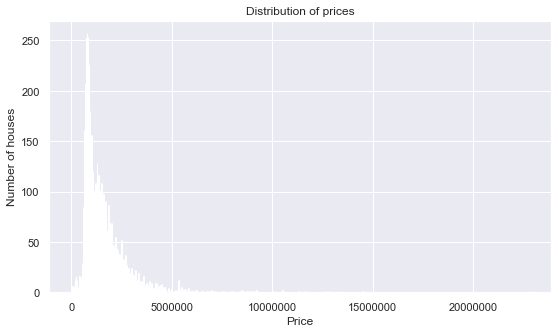

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
df_houses3['price'].hist(bins=500, ax=ax)
ax.ticklabel_format(style='plain')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.ylabel('Number of houses');

Here we see the housing prices spread. We limit the prices to 5 million initially, as our stakeholders wish to not spend more than 5mil.

We still see many outliers as determined by an IQR test. We use IQR here as the dataset is skewed. We limit the prices again to exclude outliers for more accurate analysis when regression is used later.

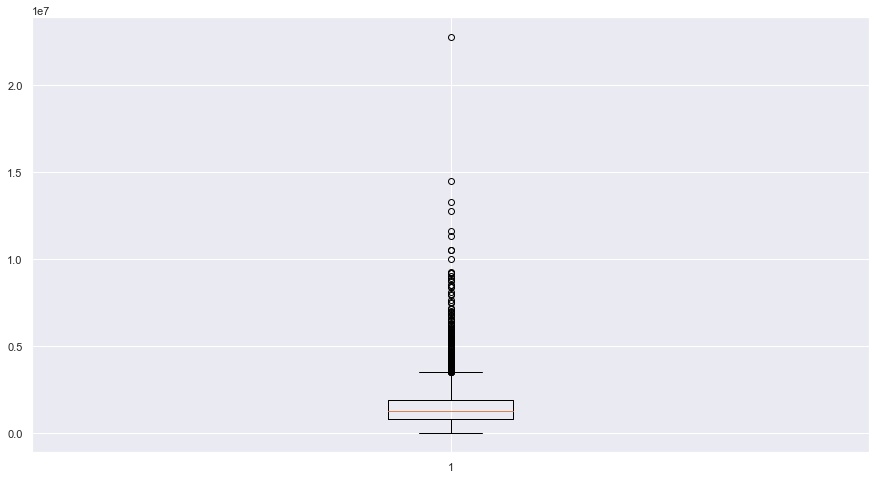

In [15]:
plt.boxplot(df_houses3['price']);

In [16]:
# df_houses3 = df_houses3.loc[df_houses3['price']<5000000]
# # IQR
# Q1 = np.percentile(df_houses3['price'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(df_houses3['price'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1

# # Upper bound
# upper_limit = Q3 + 1.5 * IQR
# upper_limit

# # Trim
# df_houses3 = df_houses3[df_houses3['price'] < upper_limit]

In [17]:
df_houses3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5070 entries, 3 to 30153
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5070 non-null   datetime64[ns]
 1   price         5070 non-null   float64       
 2   sqft_living   5070 non-null   int64         
 3   view          5070 non-null   float64       
 4   condition     5070 non-null   float64       
 5   yr_built      5070 non-null   int64         
 6   yr_renovated  5070 non-null   int64         
 7   lat           5070 non-null   float64       
 8   zip           5070 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 396.1+ KB


<AxesSubplot:>

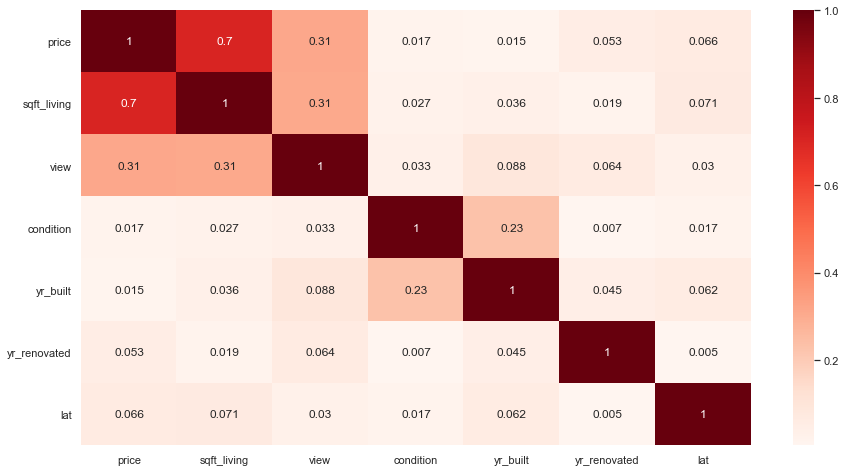

In [18]:
corr = round(abs(df_houses3.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)

# END OF CURRENT WORK

In [19]:
#Identify the number of NAs / Nulls (blank)
df_houses3.isnull().sum()

date            0
price           0
sqft_living     0
view            0
condition       0
yr_built        0
yr_renovated    0
lat             0
zip             0
dtype: int64

Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

# Data Analysis

Here, we begin to analyze the predictors/variables and test out our first linear regression. We start with sqft_living space, as our general assumption is that the bigger the living space, the higher the price of a given house.

In [20]:
x_baseline = df_houses3[['sqft_living']]
y = df_houses3['price']

baseline_model = sm.OLS(y, sm.add_constant(x_baseline)).fit().summary()

baseline_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     5006.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:10:51   Log-Likelihood:                -76279.
No. Observations:                5070   AIC:                         1.526e+05
Df Residuals:                    5068   BIC:                         1.526e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.181e+06   4.04e+04    -29.197      0.000   -1.26e+06    -1.1e+06
sqft_living   863.3073     12.201     70.756      0.000     839.388     887.227
==============================================================================
Omnibus:                     4048.523   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469240.499
Skew:                           3.119   Prob(JB):                         0.00
Kurtosis:                      49.715   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df_houses3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5070 entries, 3 to 30153
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5070 non-null   datetime64[ns]
 1   price         5070 non-null   float64       
 2   sqft_living   5070 non-null   int64         
 3   view          5070 non-null   float64       
 4   condition     5070 non-null   float64       
 5   yr_built      5070 non-null   int64         
 6   yr_renovated  5070 non-null   int64         
 7   lat           5070 non-null   float64       
 8   zip           5070 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 396.1+ KB


In [22]:
x_multi = df_houses3[["sqft_living","view","yr_built","yr_renovated"]]
y = df_houses3['price']

multi_model_v1 = sm.OLS(y, sm.add_constant(x_multi)).fit()
multi_model_v1_results = multi_model_v1.summary()
multi_model_v1_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1307.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:10:52   Log-Likelihood:                -76223.
No. Observations:                5070   AIC:                         1.525e+05
Df Residuals:                    5065   BIC:                         1.525e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.483e+06   3.15e+06     -0.470      0.638   -7.67e+06     4.7e+06
sqft_living    823.2311     12.733     64.654      0.000     798.269     848.193
view          1.413e+05   1.44e+04      9.826      0.000    1.13e+05     1.7e+05
yr_built       193.0345   1568.038      0.123      0.902   -2880.999    3267.068
yr_renovated   626.7975    182.697      3.431      0.001     268.632     984.963
==============================================================================
Omnibus:                     3949.347   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437752.897
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      48.123   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#remove waterfront and patio

x_multi = df_houses3[["sqft_living","view","yr_built","yr_renovated"]]
y = df_houses3['price']

multi_model_v1 = sm.OLS(y, sm.add_constant(x_multi)).fit()
multi_model_v1_results = multi_model_v1.summary()
multi_model_v1_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1307.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:11:18   Log-Likelihood:                -76223.
No. Observations:                5070   AIC:                         1.525e+05
Df Residuals:                    5065   BIC:                         1.525e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.483e+06   3.15e+06     -0.470      0.638   -7.67e+06     4.7e+06
sqft_living    823.2311     12.733     64.654      0.000     798.269     848.193
view          1.413e+05   1.44e+04      9.826      0.000    1.13e+05     1.7e+05
yr_built       193.0345   1568.038      0.123      0.902   -2880.999    3267.068
yr_renovated   626.7975    182.697      3.431      0.001     268.632     984.963
==============================================================================
Omnibus:                     3949.347   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437752.897
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      48.123   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.preprocessing import OneHotEncoder

#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df_houses3 = df_houses3[df_houses3.zip.str.startswith(('98'))]

#data frame with zip codes only
df_zip = df_houses3[['zip']].copy()

#Use OneHotEncoder to separate out all zip codes
ohe = OneHotEncoder(drop="first", sparse=False)
ohe.fit(df_zip)
ohe.transform(df_zip)

#New dataframe with zip codes as columns
df_zip_ohe = pd.DataFrame(
    data=ohe.transform(df_zip),
    columns=[f"zip_{cat}" for cat in ohe.categories_[0][1:]]
)

df_houses4 = df_houses3.reset_index()
df_houses4 = df_houses4.join(df_zip_ohe)

df_houses4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 89 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4957 non-null   int64         
 1   date          4957 non-null   datetime64[ns]
 2   price         4957 non-null   float64       
 3   sqft_living   4957 non-null   int64         
 4   view          4957 non-null   float64       
 5   condition     4957 non-null   float64       
 6   yr_built      4957 non-null   int64         
 7   yr_renovated  4957 non-null   int64         
 8   lat           4957 non-null   float64       
 9   zip           4957 non-null   object        
 10  zip_98002     4957 non-null   float64       
 11  zip_98003     4957 non-null   float64       
 12  zip_98004     4957 non-null   float64       
 13  zip_98005     4957 non-null   float64       
 14  zip_98006     4957 non-null   float64       
 15  zip_98007     4957 non-null   float64 

In [26]:
#based on multi_modelv1, drop waterfront and garage binaries as they have high pvalues. Then concatenate with the Zip data frame.

x_multi2 = df_houses4.drop(["price","zip","date","index"], axis= 1)
y2 = df_houses4['price']

In [27]:
multi_model_v2 = sm.OLS(y2, sm.add_constant(x_multi2)).fit()
multi_model_v2_results = multi_model_v2.summary()
multi_model_v2_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:11:24   Log-Likelihood:                -72819.
No. Observations:                4957   AIC:                         1.458e+05
Df Residuals:                    4871   BIC:                         1.464e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.779e+07   2.35e+07     -3.309      0.001   -1.24e+08   -3.17e+07
sqft_living    485.4954     10.954     44.320      0.000     464.020     506.971
view          1.966e+05    1.1e+04     17.893      0.000    1.75e+05    2.18e+05
condition     9.798e+04   3.52e+04      2.783      0.005     2.9e+04    1.67e+05
yr_built      4387.6898   1246.855      3.519      0.000    1943.291    6832.089
yr_renovated   502.0193    132.559      3.787      0.000     242.145     761.894
lat            1.44e+06   4.93e+05      2.924      0.003    4.74e+05    2.41e+06
zip_98002     9.134e+04   1.49e+05      0.611      0.541   -2.02e+05    3.84e+05
zip_98003      4.72e+04   1.11e+05      0.425      0.671   -1.71e+05    2.65e+05
zip_98004     2.692e+06   1.69e+05     15.947      0.000    2.36e+06    3.02e+06
zip_98005     1.421e+06   2.25e+05      6.315      0.000     9.8e+05    1.86e+06
zip_98006     8.392e+05   1.45e+05      5.783      0.000    5.55e+05    1.12e+06
zip_98007     9.868e+05   2.16e+05      4.576      0.000    5.64e+05    1.41e+06
zip_98008     1.455e+06   1.95e+05      7.464      0.000    1.07e+06    1.84e+06
zip_98010     3.707e+04   6.06e+04      0.612      0.540   -8.16e+04    1.56e+05
zip_98011    -1.034e+04   2.41e+05     -0.043      0.966   -4.82e+05    4.61e+05
zip_98014    -1.999e+05   2.02e+05     -0.991      0.322   -5.96e+05    1.96e+05
zip_98019    -3.872e+05   2.22e+05     -1.744      0.081   -8.22e+05    4.82e+04
zip_98022     8.201e+04   1.02e+05      0.807      0.420   -1.17e+05    2.81e+05
zip_98023    -3805.2546    8.6e+04     -0.044      0.965   -1.72e+05    1.65e+05
zip_98024     1.241e+06   1.72e+05      7.222      0.000    9.04e+05    1.58e+06
zip_98027     2.885e+05   1.33e+05      2.164      0.031    2.71e+04     5.5e+05
zip_98028    -1.306e+05   2.35e+05     -0.555      0.579   -5.92e+05     3.3e+05
zip_98029     5.492e+05   1.37e+05      4.009      0.000    2.81e+05    8.18e+05
zip_98030    -2.108e+04   8.25e+04     -0.255      0.798   -1.83e+05    1.41e+05
zip_98031    -6.185e+04   9.15e+04     -0.676      0.499   -2.41e+05    1.18e+05
zip_98032     1.109e+04   2.68e+05      0.041      0.967   -5.15e+05    5.37e+05
zip_98033      9.43e+05   1.93e+05      4.876      0.000    5.64e+05    1.32e+06
zip_98034     4.114e+05   2.14e+05      1.924      0.054   -7713.314     8.3e+05
zip_98038      7.55e+04    6.1e+04      1.238      0.216   -4.41e+04    1.95e+05
zip_98039     4.507e+06   2.43e+05     18.571      0.000    4.03e+06    4.98e+06
zip_98040     1.776e+06   1.54e+05     11.530      0.000    1.47e+06    2.08e+06
zip_98042    -1.229e+04   6.14e+04     -0.200      0.841   -1.33e+05    1.08e+05
zip_98045    -1.204e+04   1.04e+05     -0.116      0.907   -2.15e+05    1.91e+05
zip_98047     1.839e+05   2.13e+05      0.864      0.388   -2.33e+05    6.01e+05
zip_9

In [ ]:
plt.scatter(df_original['sqft_living'], df_original['price'])